This notebook will contain similar code from ```Deriv.ipynb``` and ```Main.ipynb``` to learn from a solved process.

# Heat Diffusion on a Graph

Heat on regular surfaces diffuses in this manner:

$$
    \frac{\partial H}{\partial t} = k \frac{\partial^2 H}{\partial ^2 x} 
$$

and on a graph, the Laplacian operator on the surface changes to the Laplacian Matrix, which mirrors the averaging of immediate neighbour nodes of any given node.

Thus, the normalised "Heat" vector $\vec{s}$ has the dynamics:

$$
    \frac{d \vec{s}}{d t} =  - L \vec{s}(t)
$$

Which gives us the unique solution 

$$
    \vec{s}(t) = e^{-Lt} \vec{s}(0) 
$$

where 
$$
e^{-Lt} = \sum_{n=0}^{\infty} \frac{(-Lt)^n}{n!}
$$

which can be calculated better using:

$$
    L = V \Lambda_{l} V ^{-1} \\

$$


$$
    e^{-Lt} = \sum_{n=0}^{\infty} \frac{(-Lt)^n}{n!} = V  \sum_{n=0}^{\infty} \frac{(-\Lambda_l t)^n}{n!} V^{-1}
$$


$$
    e^{-Lt} = V  e^{- \Lambda_{l} t } V^{-1}
$$


In [1]:
#  importing required libraries
%pylab inline
import pandas as pd
import matlab
import matlab.engine
import pickle as pkl
MATLAB = matlab.engine.start_matlab()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from utils3 import *

### Forward simulation
There is no *forward* simulation in this particular dynamic because it is a completely analytically determined system. This would just require us to sample the values at different points and recalculate the Laplacian that has been used.

Scheme:

- $\vec{s}(0)$ is generated randomly. The $e^{-Lt}$ is calculated at different times using the relation $e^{-Lt} = V e^{- \Lambda_l t} V^{-1}$  


In [90]:
N = 21
T = 1000
d, a = "Deg.pkl","Adj.pkl"
D, A = pkl.load(open(d,"rb")), pkl.load(open(a,"rb"))

L = D - A
ewL, eVL = linalg.eig(L)
s0 = randn(N,)
dt = 0.001

In [91]:
M0 = lambda x: dot(-1*D, x)
M1 = lambda x: ones(len(x))
M2 = lambda x: dot(A, x)

In [92]:
Samples = []
Samples.append(s0)

for i in range(1,T):
    Samples.append(dot(dot(dot(eVL, diag(exp(-ewL*dt*i))), eVL.T), s0))

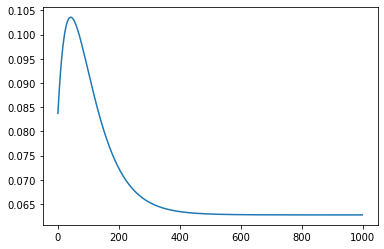

In [93]:
X0 = [(Samples[i])[0] for i in range(T)]
plot(X0)

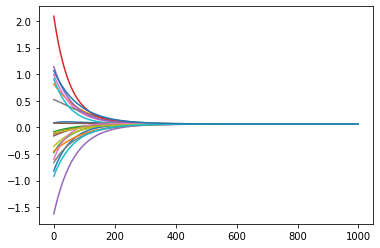

In [94]:
for j in range(21):
    plot([(Samples[i])[j] for i in range(T)])

In [95]:
k = 1
samples = [Samples[k*i] for i in range(T//k)]
derivs = [(samples[i+1] - samples[i])/(k*dt) for i in range(T//k - 1)]

In [96]:
M = 2*N*N
V = zeros((N,M))
U = zeros((N,M))

for ind in range(M):
    V[:,ind] = derivs[ind] + dot(D,samples[ind])
    U[:,ind] = samples[ind] 

In [97]:
Bigu = U_synth(reshape(U[:,0], (N,1)))
vV  = V[:,0]
j = 1
ranks = []

for j in range(M):
    Uu = U_synth(reshape(U[:,j], (N,1)))
    Bigu = append(Bigu, Uu, axis=0)
    ranks.append(linalg.matrix_rank(Bigu))
    vV = append(vV, V[:,j], axis = 0)

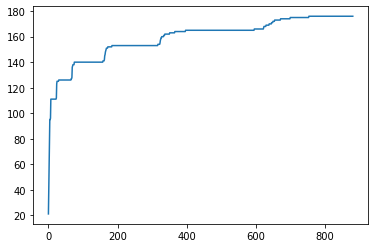

In [98]:
plot(ranks)

In [99]:
linalg.matrix_rank(Bigu)

176

In [100]:
Adj_Le = matricizer(dot(pinv(Bigu), vV))

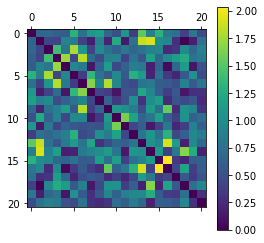

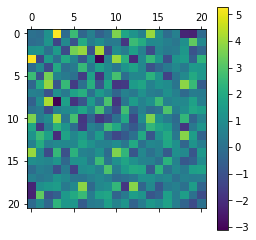

In [101]:
matshow(A)
colorbar()
matshow(Adj_Le)
colorbar()